# Importing the Modules and the helping libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# We load the Fashion MNIST Dataset from the TensorFlow Keras Library

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#Classify the array of classes

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Preprocessing the data before training the model

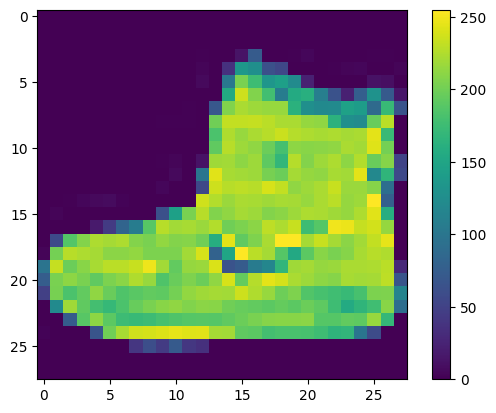

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Scaling the values from 0 to 1 by dividing it by its pixel size

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Verifying the Data in the format provided

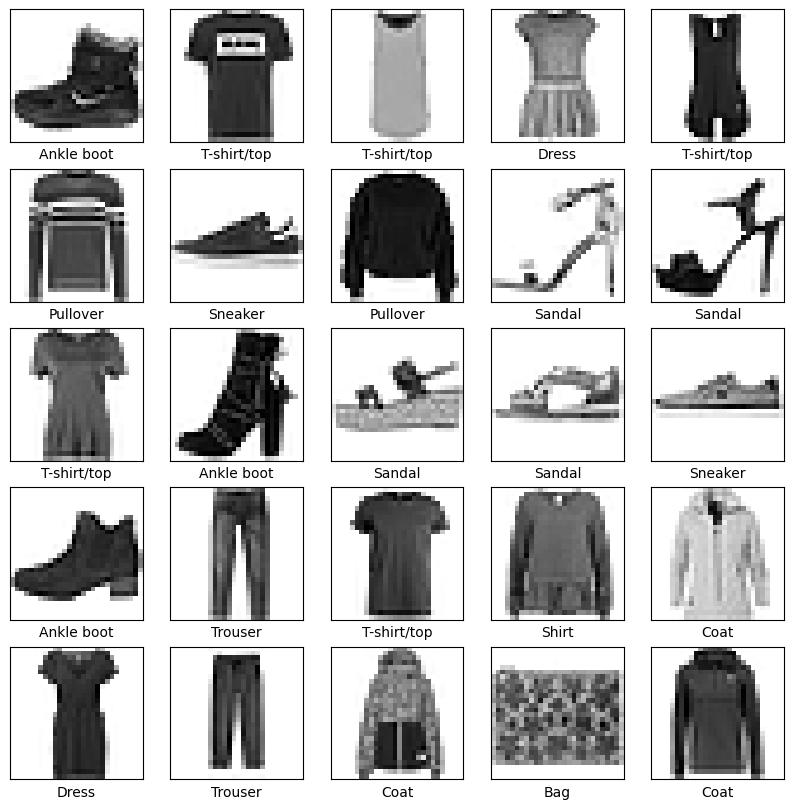

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Now we start building the model

###Setting up the layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

###Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Training the Model

##Feeding the Model

###model.fit fits the model in the training data

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5026 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3715 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3149 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2720 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2512 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.243

#Now we evaluate the accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3449 - accuracy: 0.8783 - 688ms/epoch - 2ms/step

Test accuracy: 0.8783000111579895


We got a accuracy of 87%, which is decent enough, though it can be improved

#Making Predictions using the model to check its confidence

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([4.5268461e-10, 1.5282616e-12, 2.8906806e-09, 3.4239069e-13,
       9.4481012e-10, 2.4814313e-05, 4.5156296e-09, 2.9044370e-03,
       1.5310306e-08, 9.9707061e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

###Graphing all the 10 labels

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Lets verify the predictions (blue=correct, red=incorrect)

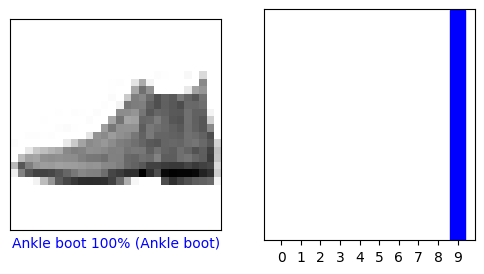

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

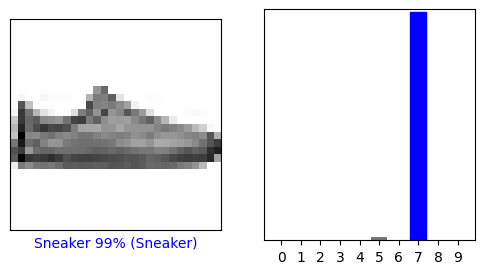

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

both the predictions are correct,
lets verify for the rest of the labels

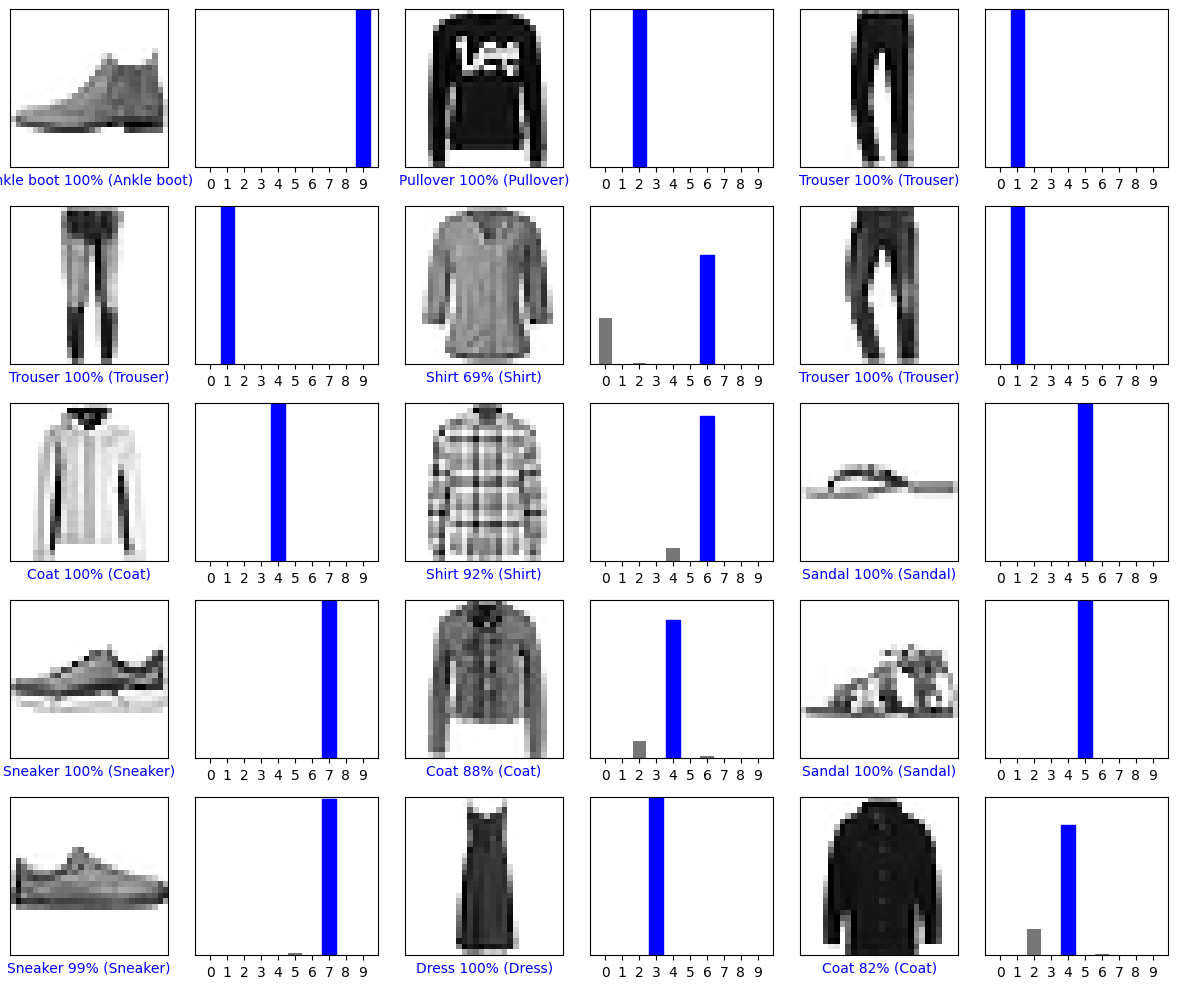

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The model is very confident in its prediction and predicted all the labels correctly

That ends our model there!